In [20]:

#Import scikit-learn dataset library
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import svm model
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
#plot
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd





In [21]:
#Load dataset
cancer = datasets.load_breast_cancer()

In [22]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [23]:
print(cancer.data.shape)

(569, 30)


In [24]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [25]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

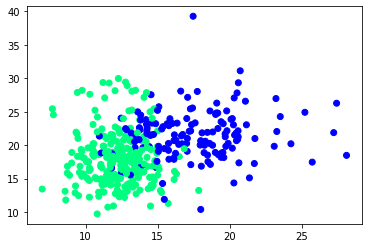

In [27]:
print(plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='winter'))

In [28]:
#Create a svm Classifier
clf = SVC(kernel='linear',C=1000) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test datase
y_pred = clf.predict(X_test)
print(clf.score(X_test,y_test))



0.9824561403508771


In [29]:
#cross-validation for linear kernel
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,cancer.data,cancer.target, cv=5)
print(scores)
print("Mean value:",scores.mean())
print("Deviation:",scores.std()*2)

[0.94736842 0.94736842 0.97368421 0.92982456 0.97345133]
Mean value: 0.9543393882937432
Deviation: 0.033913464829273605


In [30]:
#2 method for validation ShuffleSplit
from sklearn.model_selection import ShuffleSplit
n_samples=cancer.data.shape[0]
cv=ShuffleSplit(n_splits=3,test_size=3,random_state=0)
cross_val_score(clf,cancer.data,cancer.target,cv=cv)

array([1.        , 1.        , 0.66666667])

In [31]:
#KFold method
from sklearn.model_selection import KFold
kf=KFold(n_splits=2,shuffle=True)
X=['a','b','c','d']
for train, test in kf.split(X):
    print("%s %s" % (train,test))

[0 1] [2 3]
[2 3] [0 1]


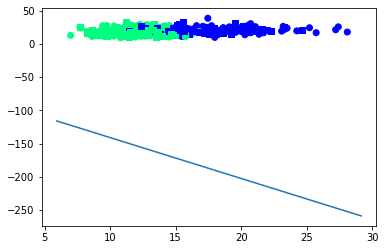

In [32]:
sv=SVC(kernel='linear')
sv.fit(X_train,y_train)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='winter')
ax=plt.gca()
xlim=ax.get_xlim()
ax.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap='winter',marker='s')
w=sv.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(xlim[0],xlim[1])
yy=a*xx-(sv.intercept_[0]/w[1])
plt.plot(xx,yy)
plt.show()

In [33]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9824561403508771


In [34]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9906542056074766
Recall: 0.9814814814814815


In [35]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[ 46  17]
 [  0 108]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        63
           1       0.86      1.00      0.93       108

    accuracy                           0.90       171
   macro avg       0.93      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171

Accuracy: 0.9005847953216374
Precision: 0.864
Recall: 1.0


In [36]:
#cross-validation for non-linear kernel(poly)
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svclassifier,cancer.data,cancer.target, cv=5)
print(scores)
print("Mean value:",scores.mean())
print("Deviation:",scores.std()*2)

[0.84210526 0.88596491 0.9122807  0.93859649 0.92920354]
Mean value: 0.9016301816488121
Deviation: 0.06944838825578109
